In [28]:
# calculation of beta =  covariance of stock with market/ variance of market 
# beta = 0  no relationship wih the market
# beta < 1  defensive stock 
# beta > 1  aggressive stock 
# beta = 1  market itself

In [27]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [52]:
stocks = ['TCS.NS', '^BSESN']                       # calculated for a period of at least 5 years
new_data = pd.DataFrame()
for t in stocks:
    new_data[t] = wb.DataReader(t, data_source='yahoo', start = '2015-10-1', end='2020-10-1')['Adj Close']
    
new_data.head()

,TCS.NS,^BSESN
Date,,
2015-10-01,1162.289917,26220.949219
2015-10-05,1191.754028,26785.550781
2015-10-06,1186.638306,26932.880859
2015-10-07,1166.395020,27035.849609
2015-10-08,1157.543701,26845.810547


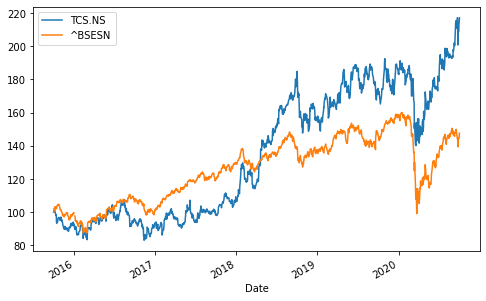

In [53]:
(new_data/new_data.iloc[0] * 100).plot(figsize=(8,5))         # normalisation and plot for comparison
plt.show()

In [54]:
log_returns= np.log(new_data/new_data.shift(1))

In [55]:
cov_stknmkt = log_returns.cov() * 250                    # covariance matrix of stock with market
cov_stknmkt

,TCS.NS,^BSESN
TCS.NS,0.065503,0.021576
^BSESN,0.021576,0.033586


In [56]:
cov_with_mkt= cov_stknmkt.iloc[0,1]                     # covariance of stock with market
cov_with_mkt

0.02157567866995565

In [57]:
mkt_var= log_returns['^BSESN'].var() * 250              # variance of market
mkt_var

0.033585638399265816

In [58]:
beta_f_stk = cov_with_mkt/mkt_var                       # cross check beta
beta_f_stk

0.642407877243962

In [65]:
#CAPM                                           # expected return = risk free rate + beta * risk premium(doubtful)
r_free = 0.059
ex_ret = r_free + beta_f_stk * (log_returns['^BSESN'].mean() *250 - r_free )                    
ex_ret

0.0741363728801905

In [67]:
# sharpe ratio  =  (rate of return of stock - risk free rate) / std deviation of stock  doubt in std() function used

sharpe = (ex_ret- r_free) / (log_returns['TCS.NS'].std() * 250 ** 0.5)
sharpe

0.05914145984883942

In [68]:
log_returns['^BSESN'].mean() *250

0.0825619353628229

In [69]:
log_returns['^BSESN'].mean() *250 - r_free

0.023561935362822903